In [0]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

In [0]:
!curl -c ./cookie -s -L "https://drive.google.com/file/d/1fJb7dDbdiGNsO-zAwopDuPRP8XfBKa_u" > /dev/null 
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1fJb7dDbdiGNsO-zAwopDuPRP8XfBKa_u" -o mini_gcommands.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    165      0 --:--:--  0:00:02 --:--:--   165
100 2206k    0 2206k    0     0   833k      0 --:--:--  0:00:02 --:--:--  833k


In [0]:
!tar -zxvf mini_gcommands.tar.gz

mini/
mini/wow/
mini/wow/8c7c9168_nohash_0.wav
mini/wow/9a7c1f83_nohash_0.wav
mini/six/
mini/six/324210dd_nohash_2.wav
mini/six/1aeef15e_nohash_0.wav
mini/up/
mini/up/b5552931_nohash_4.wav
mini/up/27b03931_nohash_0.wav
mini/up/324210dd_nohash_1.wav
mini/up/24befdb3_nohash_3.wav
mini/up/9c06a3f3_nohash_0.wav
mini/one/
mini/one/caedb73a_nohash_0.wav
mini/one/b1114e4f_nohash_0.wav
mini/one/c0e0f834_nohash_0.wav
mini/one/71aa5b54_nohash_0.wav
mini/one/095847e4_nohash_0.wav
mini/three/
mini/three/cd7f8c1b_nohash_2.wav
mini/three/9db2bfe9_nohash_0.wav
mini/three/0132a06d_nohash_3.wav
mini/three/59c3a7f2_nohash_0.wav
mini/three/7e1054e7_nohash_0.wav
mini/three/65f2531f_nohash_1.wav
mini/dog/
mini/dog/4b39347d_nohash_1.wav
mini/right/
mini/right/25132942_nohash_2.wav
mini/right/ab5ae445_nohash_0.wav
mini/right/af30314d_nohash_0.wav
mini/five/
mini/five/56cd307a_nohash_0.wav
mini/two/
mini/two/a42a88ff_nohash_1.wav
mini/two/122c5aa7_nohash_4.wav
mini/two/e7ebf59c_nohash_0.wav
mini/two/87728a88_

In [0]:
#y, sfr = librosa.load('mini/stop/57376a4c_nohash_2.wav')
from scipy.io import wavfile
sfr, y = wavfile.read('mini/stop/57376a4c_nohash_2.wav')
y = y / 2**15

In [0]:
sfr

16000

In [0]:
import IPython
import librosa.display
IPython.display.Audio("mini/stop/57376a4c_nohash_2.wav")


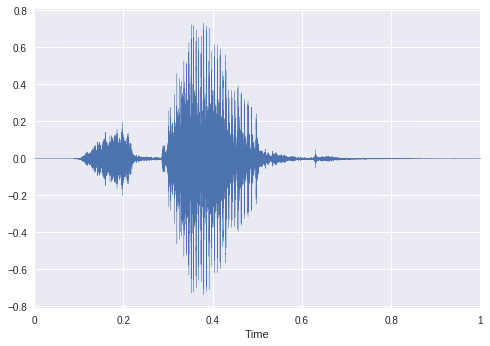

In [0]:
librosa.display.waveplot(y, sr=sfr)

In [0]:
sr

22050

In [0]:
D = np.abs(librosa.stft(y, n_fft=512))

In [0]:
D.shape

(257, 173)

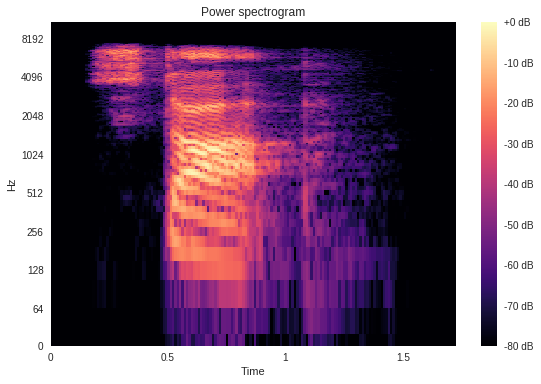

In [0]:
import librosa.display

window_stride=0.01 #One frame every 10 ms
window_size=0.02 #Window size of 20 ms
window_type='hamming'
win_length = int(sfr * window_size)
hop_length = int(sfr * window_stride)
n_fft = 512
lowfreq = 20
highfreq = sfr/2 - 400


librosa.display.specshow(librosa.amplitude_to_db(D,
                                               ref=np.max),
                          y_axis='log', x_axis='time', sr=sfr, hop_length=hop_length)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [0]:

S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window_type, center=False)
D = np.abs(S)
melFB = librosa.feature.melspectrogram(S=D, sr=sfr, n_mels=40, fmin=lowfreq, fmax=highfreq, norm=None)
mfcc_default = librosa.feature.mfcc(y=y, sr=sfr, n_mfcc=13)
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), n_mfcc=13)

In [0]:
print(D.shape)
print(melFB.shape)
print(mfcc_default.shape)
print(mfcc.shape)

(257, 98)
(40, 98)
(13, 44)
(13, 98)


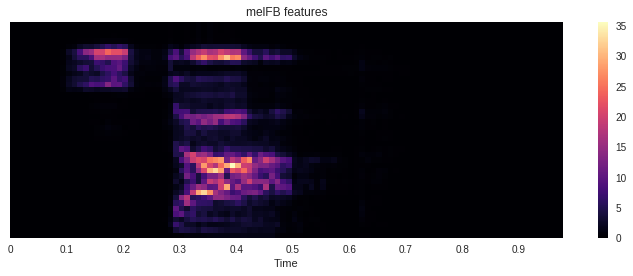

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(melFB, x_axis='time',sr=sfr, hop_length=hop_length, fmin=lowfreq, fmax=highfreq)
plt.colorbar()
plt.title('melFB features')
plt.tight_layout()

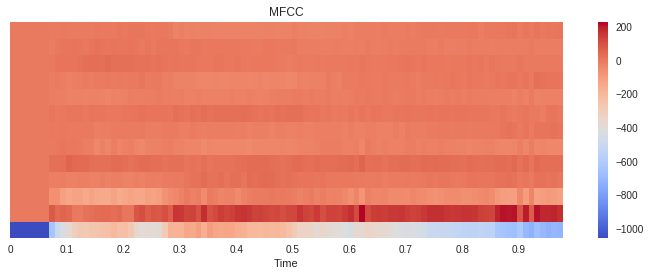

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time',sr=sfr, hop_length=hop_length, fmin=lowfreq, fmax=highfreq)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [0]:
def getParams(wavefile, window_stride=0.01, window_size=0.02, window_type='hamming', nfft=512):
  y, sfr = librosa.load(wavefile)
  win_length = int(sfr * window_size)
  hop_length = int(sfr * window_stride)
  lowfreq = 20
  highfreq = sfr/2 - 400
  S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window_type, center=False)
  D = np.abs(S)
  melFB = librosa.feature.melspectrogram(S=D, sr=sfr, n_mels=40, fmin=lowfreq, fmax=highfreq, norm=None)
  #mfcc = librosa.feature.mfcc(y=y, sr=sfr, n_mfcc=40)
  mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), n_mfcc=13)
  return [D, melFB, mfcc]
    

In [0]:
def plot_params(params, classes, title='MFCC', nrows=2, ncols=5):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle(title, size=16)
    i = 0
    for x in range(nrows):
        for y in range(ncols):
            axes[x,y].set_title(classes[i])
            axes[x,y].imshow(params[i],
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

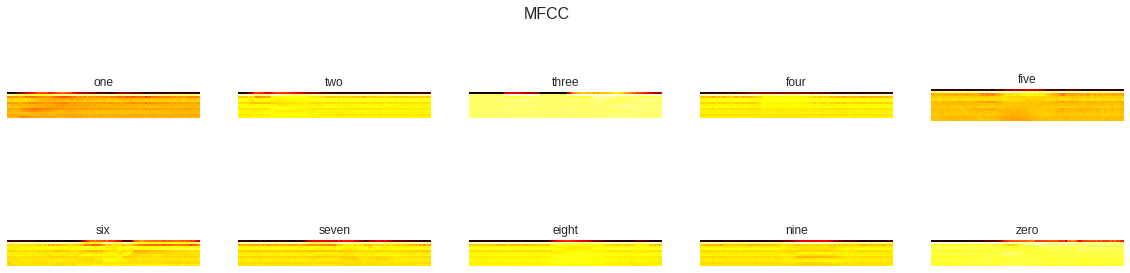

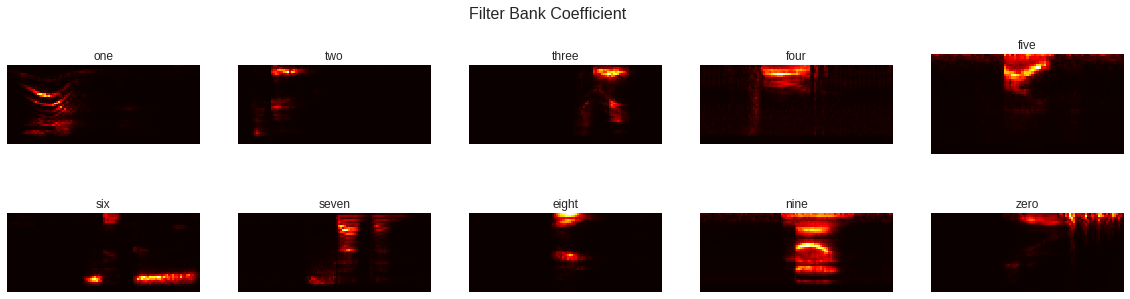

In [0]:
classes = ['one', 'two','three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'zero']
wavfiles = ['mini/one/b1114e4f_nohash_0.wav',
            'mini/two/122c5aa7_nohash_4.wav',
            'mini/three/9db2bfe9_nohash_0.wav',
            'mini/four/cc6bae0d_nohash_0.wav',
            'mini/five/56cd307a_nohash_0.wav',
            'mini/six/324210dd_nohash_2.wav',
            'mini/seven/cc592808_nohash_0.wav',
            'mini/eight/c90c0105_nohash_0.wav',
            'mini/nine/c0fb6812_nohash_3.wav',
            'mini/zero/c1d39ce8_nohash_3.wav']
filterbanks=[]
mfccs = []
for w in wavfiles:
  _, fb, mfcc = getParams(w)
  filterbanks.append(fb)
  mfccs.append(mfcc)
  
plot_params(mfccs, classes)
plot_params(filterbanks, classes, title='Filter Bank Coefficient')